**Exercise 1:**

Plot the beta distribution given by

$$\frac{dP_{(a,b)}}{d\lambda_L}(x) = \frac{\Gamma(a+b)}{\Gamma(a) \Gamma(b)}x^{a-1}(1-x)^{b-1}$$

for at least 4 combinations of (a,b). How do the model parameters change the shape of the density?

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in power


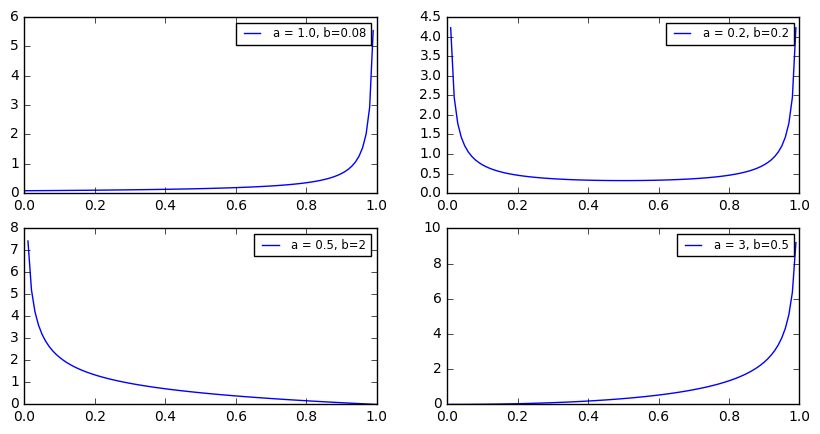

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
%matplotlib inline

BD = lambda a,b : lambda x: (gamma(a+b)/(gamma(a)*gamma(b)))*x**(a-1)*(1-x)**(b-1)

X = np.arange(0,1.01,0.01)
a = [1.,0.2,0.5,3]
b = [.08,.2,2,.5]

zipped = zip(a,b)
fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
zipped2 = zip(ax,zipped)

for e in zipped2:
    e[0].plot(X,BD(*e[1])(X), label = 'a = {0}, b={1}'.format(*e[1]))
    e[0].legend(loc = 'best', fontsize = 'small')

**Exercise 2:**

We can now interpret the Beta Distribution as a family of distributions for each fixed value of a and b. 
For a random variable X which is distributed with the Beta Distribution calculate

$$(b,a) \to E_{(b,a)}[X]$$

and plot the expectation value as a function of $(b,a)$.

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


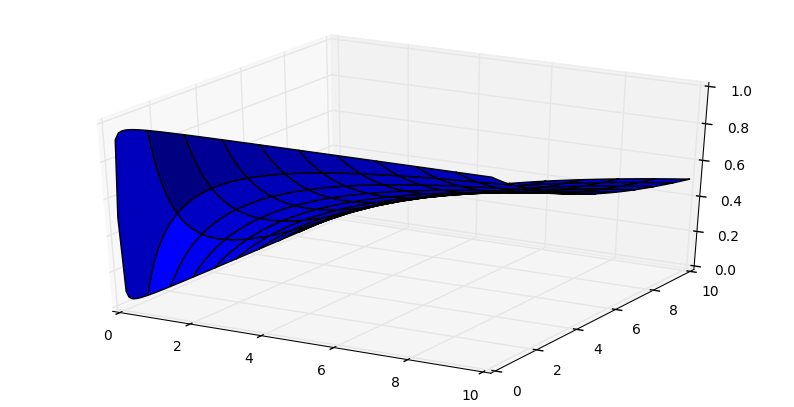

In [16]:
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

betaE = lambda b,a: integrate.quad(lambda x: x*BD(b,a)(x), 0,1)[0]
b = np.linspace(0.01,10, 100)
a = np.linspace(0.01,10, 100)
b, a = np.meshgrid(b,a)
distvec = np.vectorize(betaE)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(b, a, distvec(b, a))

**Exercise 3:**

Create an expression for the variance $$(b,a) \to Var_{(b,a)}[X^2] = E_{(b,a)}[X^2] - (E_{(b,a)}[X])^2$$ and plot the variance as a function of $(b,a)$.

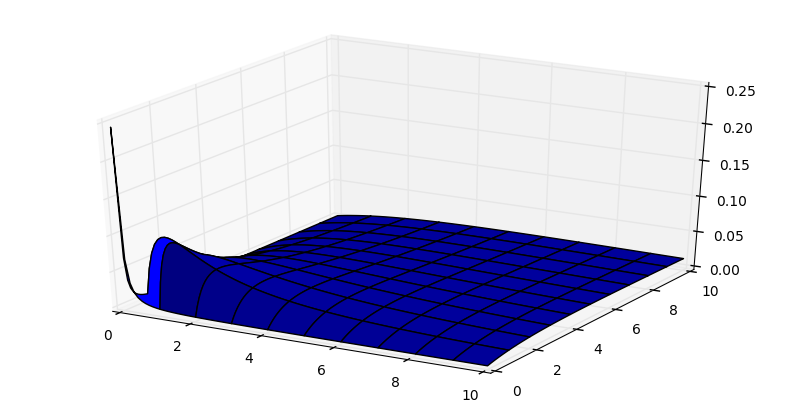

In [23]:
from scipy.integrate import quad

betaE2 = lambda b,a: quad(lambda x: (x**2)*BD(b,a)(x), 0,1)[0] - (betaE(b,a))**2
b = np.linspace(0.01,10, 100)
a = np.linspace(0.01,10, 100)
b, a = np.meshgrid(b,a)
distvec = np.vectorize(betaE2)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(a, b, distvec(a, b))